# Step 2: Read the file and Data Wrangling (for the bestseller list)

### 2.0. Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

### 2.1 Read the file

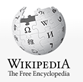

In [2]:
file1 = pd.read_csv(r'C:\Users\AnjaF\Desktop\My_final_project\files\Step_1_web_scraping_nyt_bestseller\new_york_times_bestseller_1931_2021.csv')

### 2.2. Analyze

In [3]:
file1.head()

,Unnamed: 0,0,1,Author,Book,Date,Genre,Publisher,Year
0,0,NaN,NaN,Warwick Deeping,The Ten Commandments,October 12,fiction,NaN,1931
1,1,NaN,NaN,No List Published,No List Published,October 19,fiction,NaN,1931
2,2,NaN,NaN,No List Published,No List Published,October 26,fiction,NaN,1931
3,3,NaN,NaN,No List Published,No List Published,November 2,fiction,NaN,1931
4,4,NaN,NaN,No List Published,No List Published,November 9,fiction,NaN,1931


In [4]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6910 non-null   int64 
 1   0           54 non-null     object
 2   1           545 non-null    object
 3   Author      6309 non-null   object
 4   Book        6310 non-null   object
 5   Date        6311 non-null   object
 6   Genre       6910 non-null   object
 7   Publisher   710 non-null    object
 8   Year        6910 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 486.0+ KB


In [5]:
file1["Genre"].value_counts()

fiction       4630
nonfiction    2280
Name: Genre, dtype: int64

### 2.3. copy of original df and delete columns

In [6]:
file_new = file1.copy()

### 2.4. Delete the columns 

- Delete the columns Index 0 to 2 and "Publisher", because not for all years are bestselle-list publised on wikipedia. Years without tables on wikipedia have only sentence with hint (like: please search in web for the list). I do not need this sentence in the DF. The column "Publisher" will not need, too.
- Delete the columns "Date", because this columns will not need for the project. It is important to knwo which book is in the bestseller list, it is not important to know, how often the book is in it. Because the method to calculate the amount of selling books in the bestseller list is controversial.

In [7]:
file_new.head()

,Unnamed: 0,0,1,Author,Book,Date,Genre,Publisher,Year
0,0,NaN,NaN,Warwick Deeping,The Ten Commandments,October 12,fiction,NaN,1931
1,1,NaN,NaN,No List Published,No List Published,October 19,fiction,NaN,1931
2,2,NaN,NaN,No List Published,No List Published,October 26,fiction,NaN,1931
3,3,NaN,NaN,No List Published,No List Published,November 2,fiction,NaN,1931
4,4,NaN,NaN,No List Published,No List Published,November 9,fiction,NaN,1931


In [8]:
file_new.columns

Index(['Unnamed: 0', '0', '1', 'Author', 'Book', 'Date', 'Genre', 'Publisher',
       'Year'],
      dtype='object')

In [9]:
file_new = file_new.drop(columns=["Unnamed: 0", "0", "1", "Publisher", "Date"])
file_new

,Author,Book,Genre,Year
0,Warwick Deeping,The Ten Commandments,fiction,1931
1,No List Published,No List Published,fiction,1931
2,No List Published,No List Published,fiction,1931
3,No List Published,No List Published,fiction,1931
4,No List Published,No List Published,fiction,1931
...,...,...,...,...
6905,Brandi Carlile,Broken Horses,nonfiction,2021
6906,John Boehner,On the House,nonfiction,2021
6907,George W. Bush,"Out of Many, One",nonfiction,2021
6908,Bruce D. Perry and Oprah Winfrey,What Happened to You?,nonfiction,2021


In [10]:
file_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  6309 non-null   object
 1   Book    6310 non-null   object
 2   Genre   6910 non-null   object
 3   Year    6910 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 216.1+ KB


### 2.5. Drop NaN Values and the message "No List Published"
1. Delete the rows with the string "No List Published" in the colum author, because it is not a book, it is only a hint that for this time a bestseller list does not published.

2. Drop the NaN from the columns Genre/Year, because every book has a year and a genre. Empty rows are a hint that is only a text from Wikipedia (not all years has a bestseller list and for that years wikipeda published hints (strings on the pages)). 

3. Drop the NaN from Author and drop the rows with the content "unknown; not clear from source unknown; not clear from source" and "Not published due to Newspaper Strike Not published due to Newspaper Strike"

In [11]:
# 1
file_new = file_new.drop(file_new[file_new.Author == "No List Published"].index)

In [12]:
# check the resukt
file_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6905 entries, 0 to 6909
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  6304 non-null   object
 1   Book    6305 non-null   object
 2   Genre   6905 non-null   object
 3   Year    6905 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 269.7+ KB


In [13]:
#check the result
file_new.head()

,Author,Book,Genre,Year
0,Warwick Deeping,The Ten Commandments,fiction,1931
5,John Galsworthy,Maid in Waiting,fiction,1931
7,John Galsworthy,Maid in Waiting,fiction,1931
8,John Galsworthy,Maid in Waiting,fiction,1931
9,John Galsworthy,Maid in Waiting,fiction,1931


In [14]:
#2
file_new = file_new.dropna(subset=["Genre"])

In [15]:
#3
file_new = file_new.dropna(subset=["Author"])
file_new = file_new.drop(file_new[file_new.Author == "unknown; not clear from source unknown; not clear from source"].index)
file_new = file_new.drop(file_new[file_new.Author == "Not published due to Newspaper Strike Not published due to Newspaper Strike"].index)

In [16]:
#check the result
file_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 6909
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  6304 non-null   object
 1   Book    6304 non-null   object
 2   Genre   6304 non-null   object
 3   Year    6304 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 375.3+ KB


In [17]:
# check the result
file_new.head()

,Author,Book,Genre,Year
0,Warwick Deeping,The Ten Commandments,fiction,1931
5,John Galsworthy,Maid in Waiting,fiction,1931
7,John Galsworthy,Maid in Waiting,fiction,1931
8,John Galsworthy,Maid in Waiting,fiction,1931
9,John Galsworthy,Maid in Waiting,fiction,1931


### Step between
- because after I drop the duplicates the rows will reduced from around 5000 to around 1000. I save the DataFRame with the status before drop duplicates to check this in Tableau and Excel

In [18]:
# save the file
file_new.to_csv("NYT_book_with_duplicates.csv")
# result: There are a lots of duplicates: In the end, there are round 4/5 duplicates int the list

### 2.6. Check and drop duplicates and sepcifiv values/strings
There are lots of duplicates in the list because some book titles are the best selling book for several weeks.

In [19]:
file_new = file_new.drop_duplicates("Book")

In [20]:
# check the result
file_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 6909
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  1400 non-null   object
 1   Book    1400 non-null   object
 2   Genre   1400 non-null   object
 3   Year    1400 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 54.7+ KB


In [21]:
# check the result
file_new.head()

,Author,Book,Genre,Year
0,Warwick Deeping,The Ten Commandments,fiction,1931
5,John Galsworthy,Maid in Waiting,fiction,1931
13,William McFee,The Harbourmaster,fiction,1932
15,Francis Brett Young,Mr. and Mrs. Pennington,fiction,1932
17,Robert Herrick,The End of Desire,fiction,1932


### 2.7 Reset Index

In [22]:
file_new.reset_index(inplace = True)

In [23]:
file_new.head()

,index,Author,Book,Genre,Year
0,0,Warwick Deeping,The Ten Commandments,fiction,1931
1,5,John Galsworthy,Maid in Waiting,fiction,1931
2,13,William McFee,The Harbourmaster,fiction,1932
3,15,Francis Brett Young,Mr. and Mrs. Pennington,fiction,1932
4,17,Robert Herrick,The End of Desire,fiction,1932


In [24]:
# column "index" is not necessary
file_new = file_new.drop(columns=["index"])
file_new

,Author,Book,Genre,Year
0,Warwick Deeping,The Ten Commandments,fiction,1931
1,John Galsworthy,Maid in Waiting,fiction,1931
2,William McFee,The Harbourmaster,fiction,1932
3,Francis Brett Young,Mr. and Mrs. Pennington,fiction,1932
4,Robert Herrick,The End of Desire,fiction,1932
...,...,...,...,...
1395,Brandi Carlile,Broken Horses,nonfiction,2021
1396,John Boehner,On the House,nonfiction,2021
1397,George W. Bush,"Out of Many, One",nonfiction,2021
1398,Bruce D. Perry and Oprah Winfrey,What Happened to You?,nonfiction,2021


In [25]:
# save the new list without duplicates
file_new.to_csv("NYT_book_without_duplicates.csv")

### 2.8 Create a new column "Searching_Value"

1. Because Autor + Book = new column will need to scrape the ISBN from the internet. After that the ISBN will use to scrape more inforamtions from AMAZON

2. Replace the empty spaces with +. This will need to scrape the ISBN.

In [26]:
# 1
# create new column
file_new["Searching_Value"] = file_new["Book"] + " " + file_new["Author"]

In [27]:
# check the result
file_new.head()

,Author,Book,Genre,Year,Searching_Value
0,Warwick Deeping,The Ten Commandments,fiction,1931,The Ten Commandments Warwick Deeping
1,John Galsworthy,Maid in Waiting,fiction,1931,Maid in Waiting John Galsworthy
2,William McFee,The Harbourmaster,fiction,1932,The Harbourmaster William McFee
3,Francis Brett Young,Mr. and Mrs. Pennington,fiction,1932,Mr. and Mrs. Pennington Francis Brett Young
4,Robert Herrick,The End of Desire,fiction,1932,The End of Desire Robert Herrick


In [28]:
# 2
# Replace empty space with +
file_new['Searching_Value2'] = file_new['Searching_Value'].str.replace(" ", "+")

In [29]:
file_new.head()

,Author,Book,Genre,Year,Searching_Value,Searching_Value2
0,Warwick Deeping,The Ten Commandments,fiction,1931,The Ten Commandments Warwick Deeping,The+Ten+Commandments+Warwick+Deeping
1,John Galsworthy,Maid in Waiting,fiction,1931,Maid in Waiting John Galsworthy,Maid+in+Waiting+John+Galsworthy
2,William McFee,The Harbourmaster,fiction,1932,The Harbourmaster William McFee,The+Harbourmaster+William+McFee
3,Francis Brett Young,Mr. and Mrs. Pennington,fiction,1932,Mr. and Mrs. Pennington Francis Brett Young,Mr.+and+Mrs.+Pennington+Francis+Brett+Young
4,Robert Herrick,The End of Desire,fiction,1932,The End of Desire Robert Herrick,The+End+of+Desire+Robert+Herrick


### 2.9 Create a new csv_file for the Step3 - Web Scraping the ISBN

In [30]:
# inactive because web scraping on AMZ does not work 
# file_new.to_excel("NYT_bestseller_Step_3.xlsx")

### Additional information

After the start of Step 3. It was not possible to scrape the informations from Amazon. Amazon blocked the web scraping. So I use datat search to find additional files to fill the gap. The file that I found starts with the year 2009.

### 2.9.1 Reducing the datatset
On Kaggle are datasets about bestseller books for the years 2009 to 2020. So the dataset of file_new will reduce. The years < 2009 will delete.

In [31]:
file_new = file_new.drop(file_new[file_new.Year < 2009].index)

In [32]:
# check the results
file_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 601 to 1399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Author            580 non-null    object
 1   Book              580 non-null    object
 2   Genre             580 non-null    object
 3   Year              580 non-null    int64 
 4   Searching_Value   580 non-null    object
 5   Searching_Value2  580 non-null    object
dtypes: int64(1), object(5)
memory usage: 31.7+ KB


In [33]:
# the columns Searching_Value and Searching_Value2 will not needed -> delete this columns
file_new = file_new.drop(columns=["Searching_Value", "Searching_Value2"])

In [34]:
file_new.reset_index(inplace = True)

In [35]:
# create a new csv_file
file_new.to_excel("NYT_bestseller_reduce_dataset.xlsx")

-> Step 3 is failed. So please go to **Step 4**. Thank you